In [1]:

import GNN_module.scripts as scripts #only used for on the fly reloads
import GNN_module.metrics as metrics #only used for on the fly reloads
import GNN_module.plotting as plotting #only used for on the fly reloads
import GNN_module.pertubate as pertubate #only used for on the fly reloads
import GNN_module.stats as stats #only used for on the fly reloads

import importlib #only used for on the fly reloads
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import numpy as np

from GNN_module.scripts import *
from GNN_module.metrics import *
from GNN_module.plotting import *
from GNN_module.pertubate import *
from GNN_module.stats import *

import random


In [46]:
#Run this to reload the scripts without restarting the kernel
importlib.reload(scripts)
importlib.reload(metrics)
importlib.reload(plotting)
importlib.reload(pertubate)
importlib.reload(stats)
from GNN_module.scripts import *
from GNN_module.metrics import *
from GNN_module.plotting import *
from GNN_module.pertubate import *
from GNN_module.stats import *

In [2]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


# IMPORTANT: write requirements file and readme after work is done

# Datasets

In [3]:
dataset_cora = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
dataset_citeseer = Planetoid(root='data/Planetoid', name='CiteSeer', transform=NormalizeFeatures())
dataset_pubmed = Planetoid(root='data/Planetoid', name='Pubmed', transform=NormalizeFeatures())

In [4]:
data_cora = dataset_cora[0]
data_citeseer = dataset_citeseer[0]
data_pubmed = dataset_pubmed[0]

In [5]:
dataset_statistics(dataset_cora)

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [6]:
dataset_statistics(dataset_citeseer)

Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [7]:
dataset_statistics(dataset_pubmed)

Dataset: Pubmed():
Number of graphs: 1
Number of features: 500
Number of classes: 3
Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Number of training nodes: 60
Training node label rate: 0.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


# Model initialising

In [8]:
gat_cora, optimizer_gat_cora = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gat_cora.pkl', dataset=dataset_cora, model_type='GAT')
gatv2_cora, optimizer_gatv2_cora = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gatv2_cora.pkl', dataset=dataset_cora, model_type='GATv2')

gat_citeseer, optimizer_gat_citeseer = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gat_CiteSeer.pkl', dataset=dataset_citeseer, model_type='GAT')
gatv2_citeseer, optimizer_gatv2_citeseer = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gatv2_CiteSeer.pkl', dataset=dataset_citeseer, model_type='GATv2')

In [9]:
num_params_gat_cora = count_trainable_parameters(gat_cora)
num_params_gatv2_cora = count_trainable_parameters(gatv2_cora)

print(f'Number of trainable parameters in GAT Cora: {num_params_gat_cora}')
print(f'Number of trainable parameters in GATv2 Cora: {num_params_gatv2_cora}')

Number of trainable parameters in GAT Cora: 47863
Number of trainable parameters in GATv2 Cora: 35203


In [10]:
num_params_gat_citeseer = count_trainable_parameters(gat_citeseer)
num_params_gatv2_citeseer = count_trainable_parameters(gatv2_citeseer)

print(f'Number of trainable parameters in GAT CiteSeer: {num_params_gat_citeseer}')
print(f'Number of trainable parameters in GATv2 CiteSeer: {num_params_gatv2_citeseer}')

Number of trainable parameters in GAT CiteSeer: 243526
Number of trainable parameters in GATv2 CiteSeer: 240342


In [11]:
#Only run if the model is defined

num_params_gat_pubmed = count_trainable_parameters(gat_pubmed)
num_params_gatv2_pubmed = count_trainable_parameters(gatv2_pubmed)

print(f'Number of trainable parameters in GAT Pubmed: {num_params_gat_pubmed}')
print(f'Number of trainable parameters in GATv2 Pubmed: {num_params_gatv2_pubmed}')

NameError: name 'gat_pubmed' is not defined

# Training

In [12]:
num_epochs = 500
criterion = torch.nn.CrossEntropyLoss()

## CiteSeer

In [13]:
loss_list_gat_citeseer = train_model(num_epochs, gat_citeseer,data_citeseer, optimizer_gat_citeseer, criterion)
loss_list_gatv2_citeseer = train_model(num_epochs, gatv2_citeseer,data_citeseer, optimizer_gatv2_citeseer, criterion)

Training model...
Epoch 500, Loss: 0.8280295133590698
Training finished

Training model...
Epoch 500, Loss: 0.47260427474975586
Training finished



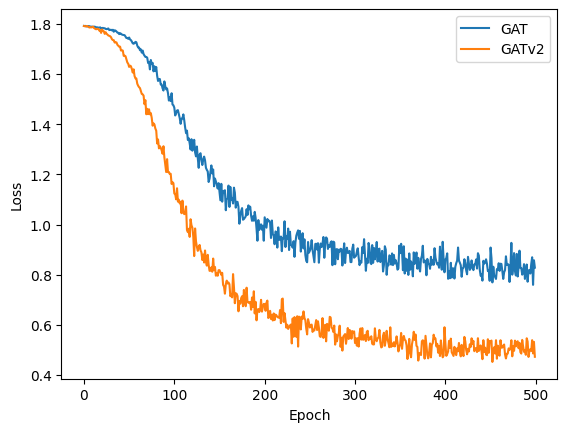

In [14]:
plt.plot(loss_list_gat_citeseer, label='GAT')
plt.plot(loss_list_gatv2_citeseer, label='GATv2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
del loss_list_gat_citeseer, loss_list_gatv2_citeseer
gat_citeseer_acc = test_model(data_citeseer.test_mask, gat_citeseer, data_citeseer)
gatv2_citeseer_acc = test_model(data_citeseer.test_mask, gatv2_citeseer, data_citeseer)

print(f"GAT CiteSeer Test Accuracy: {gat_citeseer_acc:.4f}")
print(f"GATv2 CiteSeer Test Accuracy: {gatv2_citeseer_acc:.4f}")

GAT CiteSeer Test Accuracy: 0.7010
GATv2 CiteSeer Test Accuracy: 0.7030


## Cora

In [16]:
loss_list_gat_cora = train_model(num_epochs, gat_cora, data_cora, optimizer_gat_cora, criterion)
loss_list_gatv2_cora = train_model(num_epochs, gatv2_cora, data_cora, optimizer_gatv2_cora, criterion)

Training model...
Epoch 500, Loss: 0.44680961966514596
Training finished

Training model...
Epoch 500, Loss: 1.1991505622863773
Training finished



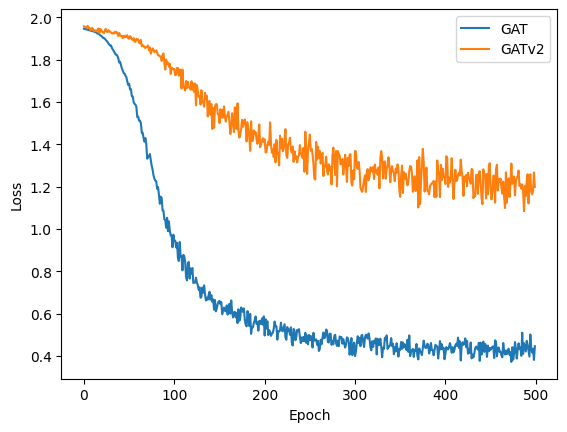

In [17]:
plt.plot(loss_list_gat_cora, label='GAT')
plt.plot(loss_list_gatv2_cora, label='GATv2')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [18]:
del loss_list_gat_cora, loss_list_gatv2_cora
gat_cora_acc = test_model(data_cora.test_mask, gat_cora, data_cora)
gatv2_cora_acc = test_model(data_cora.test_mask, gatv2_cora, data_cora)

print(f"GAT Cora Test Accuracy: {gat_cora_acc:.4f}")
print(f"GATv2 Cora Test Accuracy: {gatv2_cora_acc:.4f}")

GAT Cora Test Accuracy: 0.7980
GATv2 Cora Test Accuracy: 0.8440


# Robustness

We can test robustness to disruptions in the data in a number of ways:

- Adding feature noise (Gaussian noise to each feature or noise acroos entire dataset)
- Adding non existing edges
- Removing edges

In [19]:
#Number of times each experiment is repeated
n = 10

## Feature noise

### CiteSeer

In [20]:
scale_noise_citeseer, test_noise_gat_citeseer = do_n_tests(test_feature_noise_robustness, gat_citeseer, data_citeseer, n=n)
_ , test_noise_gatv2_citeseer = do_n_tests(test_feature_noise_robustness, gatv2_citeseer, data_citeseer, n=n)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



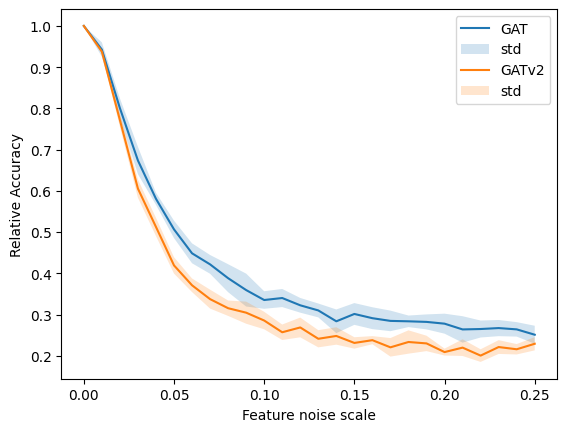

In [21]:
test_noise_citeseer = np.array([test_noise_gat_citeseer, test_noise_gatv2_citeseer])
plot_n_tests(test_noise_citeseer, scale_noise_citeseer, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Feature noise scale')

In [22]:
print('GAT')
robustness_report(test_noise_gat_citeseer)
print('\nGATv2')
robustness_report(test_noise_gatv2_citeseer)

GAT
CV: 0.065 ± 0.028
AUC: 10.12 ± 0.092

GATv2
CV: 0.063 ± 0.028
AUC: 8.709 ± 0.078


In [23]:
del scale_noise_citeseer, test_noise_gat_citeseer, test_noise_gatv2_citeseer, test_noise_citeseer

### Cora

In [24]:
scale_noise_cora, test_noise_gat_cora = do_n_tests(test_feature_noise_robustness, gat_cora, data_cora, n=n)
_ , test_noise_gatv2_cora = do_n_tests(test_feature_noise_robustness, gatv2_cora, data_cora, n=n)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



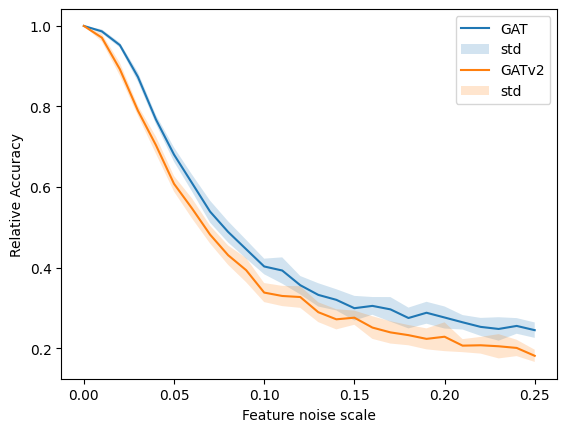

In [25]:
test_noise_cora = np.array([test_noise_gat_cora,test_noise_gatv2_cora])
plot_n_tests(test_noise_cora, scale_noise_cora, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Feature noise scale')

In [26]:
print('GAT')
robustness_report(test_noise_gat_cora)
print('\nGATv2')
robustness_report(test_noise_gatv2_cora)

GAT
CV: 0.062 ± 0.034
AUC: 11.528 ± 0.092

GATv2
CV: 0.074 ± 0.04
AUC: 10.231 ± 0.089


In [27]:
del scale_noise_cora, test_noise_gat_cora, test_noise_gatv2_cora, test_noise_cora

## Adding edges

### CiteSeer

In [28]:
num_added_edges_citeseer, test_AE_gat_citeseer = do_n_tests(test_edge_adding_robustness, gat_citeseer, data_citeseer, n=n)
_ , test_AE_gatv2_citeseer = do_n_tests(test_edge_adding_robustness, gatv2_citeseer, data_citeseer, n=n)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



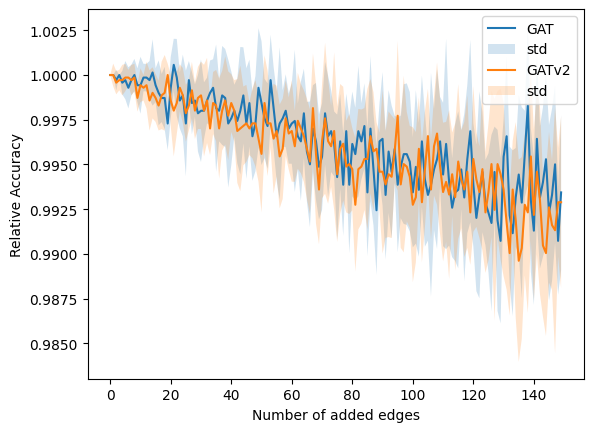

In [29]:
test_AE_citeseer = np.array([test_AE_gat_citeseer, test_AE_gatv2_citeseer])
plot_n_tests(test_AE_citeseer, num_added_edges_citeseer, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Number of added edges')

In [30]:
print('GAT')
robustness_report(test_AE_gat_citeseer)
print('\nGATv2')
robustness_report(test_AE_gatv2_citeseer)

GAT
CV: 0.003 ± 0.001
AUC: 148.447 ± 0.036

GATv2
CV: 0.003 ± 0.001
AUC: 148.387 ± 0.041


In [31]:
del num_added_edges_citeseer, test_AE_gat_citeseer, test_AE_gatv2_citeseer, test_AE_citeseer

### Cora

In [32]:
num_added_edges_cora, test_AE_gat_cora = do_n_tests(test_edge_adding_robustness, gat_cora, data_cora, n=n)
_, test_AE_gatv2_cora = do_n_tests(test_edge_adding_robustness, gatv2_cora, data_cora, n=n)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



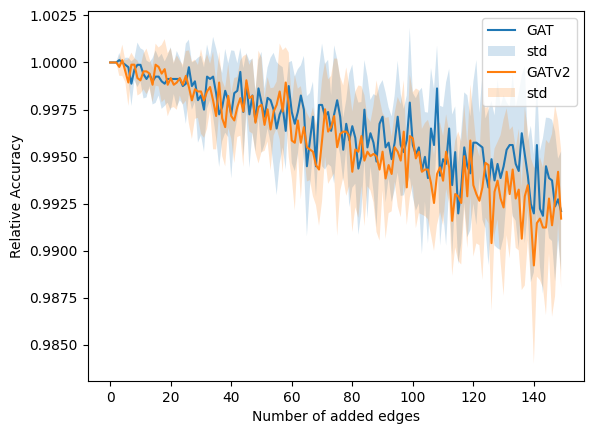

In [33]:
test_AE_cora = np.array([test_AE_gat_cora, test_AE_gatv2_cora])
plot_n_tests(test_AE_cora, num_added_edges_cora, titels=['GAT', 'GATv2'], xlabel='Number of added edges', ylabel='Relative Accuracy')

In [34]:
print('GAT')
robustness_report(test_AE_gat_cora)
print('\nGATv2')
robustness_report(test_AE_gatv2_cora)

GAT
CV: 0.002 ± 0.001
AUC: 148.502 ± 0.025

GATv2
CV: 0.002 ± 0.001
AUC: 148.394 ± 0.031


In [35]:
del num_added_edges_cora, test_AE_gat_cora, test_AE_gatv2_cora, test_AE_cora

## Removing edges

### CiteSeer

In [36]:
num_removed_edges_citeseer, test_RE_gat_citeseer = do_n_tests(test_edge_removal_robustness, gat_citeseer, data_citeseer, n=n)
_ , test_RE_gatv2_citeseer = do_n_tests(test_edge_removal_robustness, gatv2_citeseer, data_citeseer, n=n)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



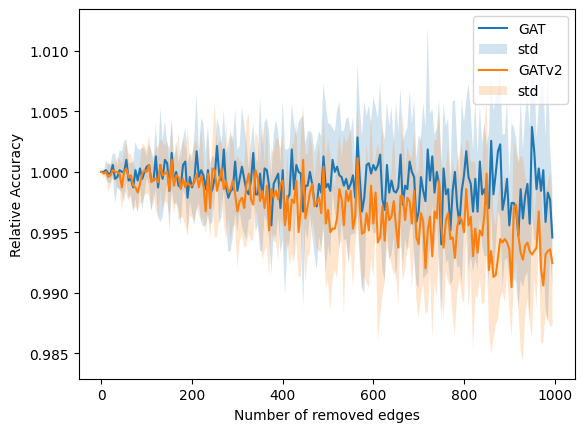

In [37]:
test_RE_citeseer = np.array([test_RE_gat_citeseer, test_RE_gatv2_citeseer])
plot_n_tests(test_RE_citeseer, num_removed_edges_citeseer, titels=['GAT', 'GATv2'], xlabel='Number of removed edges', ylabel='Relative Accuracy')

In [38]:
print('GAT')
robustness_report(test_RE_gat_citeseer)
print('\nGATv2')
robustness_report(test_RE_gatv2_citeseer)

GAT
CV: 0.004 ± 0.002
AUC: 198.829 ± 0.077

GATv2
CV: 0.004 ± 0.002
AUC: 198.412 ± 0.057


In [39]:
del num_removed_edges_citeseer, test_RE_gat_citeseer, test_RE_gatv2_citeseer, test_RE_citeseer

### Cora

In [40]:
num_removed_edges_cora, test_RE_gat_cora = do_n_tests(test_edge_removal_robustness, gat_cora, data_cora, n=n)
_, test_RE_gatv2_cora = do_n_tests(test_edge_removal_robustness, gatv2_cora, data_cora, n=n)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



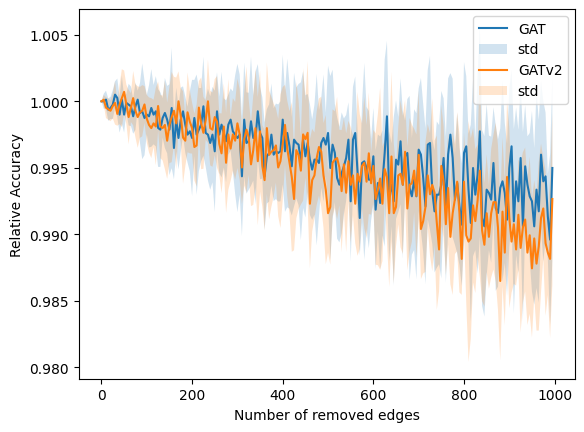

In [41]:
test_RE_cora = np.array([test_RE_gat_cora, test_RE_gatv2_cora])
plot_n_tests(test_RE_cora, num_removed_edges_cora, titels=['GAT', 'GATv2'], xlabel='Number of removed edges', ylabel='Relative Accuracy')

In [42]:
print('GAT')
robustness_report(test_RE_gat_cora)
print('\nGATv2')
robustness_report(test_RE_gatv2_cora)

GAT
CV: 0.004 ± 0.002
AUC: 198.195 ± 0.056

GATv2
CV: 0.004 ± 0.002
AUC: 197.98 ± 0.042


In [43]:
del num_removed_edges_cora, test_RE_gat_cora, test_RE_gatv2_cora, test_RE_cora

## Setting some feature vector values to zero/constant


# Removing nodes

# Robustness metrics

Metrics we could try:
- RMSE (Prediction stability)
- Area under the curve

And for the variance based approaches
- Performance variance
- Coefficient of variation
- Linear degradation slope